In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:

data = pd.read_csv('AUTO.L.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1231,04/02/2020,584.000000,594.400024,579.599976,591.200012,591.200012,2967856
1232,05/02/2020,591.200012,599.200012,581.000000,582.000000,582.000000,10717463
1233,06/02/2020,585.799988,589.200012,580.400024,587.799988,587.799988,2973413
1234,07/02/2020,585.400024,587.599976,575.400024,578.200012,578.200012,2499354
1235,10/02/2020,572.000000,580.599976,572.000000,580.200012,580.200012,2330807


In [3]:
data_training = data[:1100]
data_test = data[1100:]

In [4]:

data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.02659192, 0.05059863, 0.        , 0.01199718, 1.        ],
       [0.02946673, 0.03804162, 0.06917542, 0.0388144 , 0.0648005 ],
       [0.04240334, 0.02993159, 0.06917542, 0.03740296, 0.02068952],
       ...,
       [0.82233724, 0.80843782, 0.80575538, 0.78376859, 0.02500882],
       [0.80451343, 0.79874579, 0.80188149, 0.79957657, 0.01544697],
       [0.80968821, 0.82611174, 0.82346418, 0.81199724, 0.01422025]])

In [6]:
data_training[0:10]

array([[0.02659192, 0.05059863, 0.        , 0.01199718, 1.        ],
       [0.02946673, 0.03804162, 0.06917542, 0.0388144 , 0.0648005 ],
       [0.04240334, 0.02993159, 0.06917542, 0.03740296, 0.02068952],
       [0.03737243, 0.0313569 , 0.07332595, 0.03740296, 0.02146534],
       [0.04240334, 0.02993159, 0.06865796, 0.02540579, 0.01358595],
       [0.02587322, 0.01354048, 0.05810736, 0.01482004, 0.01198915],
       [0.02371712, 0.01924173, 0.04150525, 0.00211715, 0.01740883],
       [0.00934311, 0.        , 0.04219701, 0.00776288, 0.01052524],
       [0.01437401, 0.01068985, 0.04039846, 0.        , 0.02196463],
       [0.        , 0.01140251, 0.04634753, 0.02046577, 0.02011209]])

In [7]:

X_train = []
y_train = []

In [8]:
for i in range(30, data_training.shape[0]):
    X_train.append(data_training[i-30:i])
    y_train.append(data_training[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:

X_train.shape

(1070, 30, 5)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [12]:

model = Sequential()
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            4320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,671
Trainable params: 11,671
Non-trainable params: 0
_________________________________________________________________


In [14]:

model.compile(optimizer='adam', loss = 'mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)

Train on 963 samples, validate on 107 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
963/963 [==============================] - 6s 6ms/sample - loss: 0.0567 - val_loss: 0.4652
Epoch 2/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0024 - val_loss: 0.0525
Epoch 3/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0015 - val_loss: 0.0700
Epoch 4/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0014 - val_loss: 0.0815
Epoch 5/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0014 - val_loss: 0.0519
Epoch 6/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0013 - val_loss: 0.0345
Epoch 7/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0013 - val_loss: 0.0320
Epoch 8/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0012 - val_loss: 0.0175
Epoch 9/50
963/963 [==============================] - 4s 4ms/sample - loss: 0.0012 - val_l

In [16]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1100,30/07/2019,541.799988,545.599976,536.799988,538.200012,531.339966,2445791
1101,31/07/2019,537.200012,544.799988,532.000000,541.799988,534.894043,10597517
1102,01/08/2019,544.400024,544.400024,533.799988,538.000000,531.142517,2739137
1103,02/08/2019,533.799988,533.799988,521.200012,526.200012,519.492920,4224948
1104,05/08/2019,522.400024,540.495972,510.799988,513.400024,506.856110,3418445


In [17]:
data_training


array([[0.02659192, 0.05059863, 0.        , 0.01199718, 1.        ],
       [0.02946673, 0.03804162, 0.06917542, 0.0388144 , 0.0648005 ],
       [0.04240334, 0.02993159, 0.06917542, 0.03740296, 0.02068952],
       ...,
       [0.82233724, 0.80843782, 0.80575538, 0.78376859, 0.02500882],
       [0.80451343, 0.79874579, 0.80188149, 0.79957657, 0.01544697],
       [0.80968821, 0.82611174, 0.82346418, 0.81199724, 0.01422025]])

In [18]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1100,30/07/2019,541.799988,545.599976,536.799988,538.200012,531.339966,2445791
1101,31/07/2019,537.200012,544.799988,532.000000,541.799988,534.894043,10597517
1102,01/08/2019,544.400024,544.400024,533.799988,538.000000,531.142517,2739137
1103,02/08/2019,533.799988,533.799988,521.200012,526.200012,519.492920,4224948
1104,05/08/2019,522.400024,540.495972,510.799988,513.400024,506.856110,3418445


In [19]:



data_test.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
1206,30/12/2019,609.599976,612.000000,603.599976,603.599976,601.163635,2965365
1207,31/12/2019,603.599976,606.200012,592.000000,594.599976,592.200012,1013071
1208,02/01/2020,603.200012,604.799988,591.400024,594.000000,594.000000,2082021
1209,03/01/2020,591.000000,591.000000,583.400024,584.599976,584.599976,2058137
1210,06/01/2020,579.000000,582.000000,574.400024,577.000000,577.000000,3866707
1211,07/01/2020,580.599976,583.599976,570.000000,570.000000,570.000000,2715837
1212,08/01/2020,563.200012,571.200012,554.000000,558.200012,558.200012,5206957
1213,09/01/2020,559.599976,569.599976,558.000000,563.200012,563.200012,3758277
1214,10/01/2020,571.000000,571.000000,561.200012,566.200012,566.200012,1592179
1215,13/01/2020,566.799988,576.400024,562.400024,575.000000,575.000000,3578136


In [20]:
past_30_days = data_test.tail(30)

In [21]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1100,30/07/2019,541.799988,545.599976,536.799988,538.200012,531.339966,2445791
1101,31/07/2019,537.200012,544.799988,532.000000,541.799988,534.894043,10597517
1102,01/08/2019,544.400024,544.400024,533.799988,538.000000,531.142517,2739137
1103,02/08/2019,533.799988,533.799988,521.200012,526.200012,519.492920,4224948
1104,05/08/2019,522.400024,540.495972,510.799988,513.400024,506.856110,3418445
1105,06/08/2019,512.599976,516.599976,507.799988,510.399994,503.894318,3591519
1106,07/08/2019,511.200012,520.200012,509.600006,520.200012,513.569397,3368649
1107,08/08/2019,521.000000,530.400024,519.400024,530.000000,523.244507,2922578
1108,09/08/2019,530.000000,539.400024,529.599976,535.200012,528.378235,4851786
1109,12/08/2019,535.200012,540.599976,529.400024,538.000000,531.142517,4787154


In [22]:
df = past_30_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,609.599976,612.000000,603.599976,603.599976,2965365
1,603.599976,606.200012,592.000000,594.599976,1013071
2,603.200012,604.799988,591.400024,594.000000,2082021
3,591.000000,591.000000,583.400024,584.599976,2058137
4,579.000000,582.000000,574.400024,577.000000,3866707


In [23]:

inputs = scaler.transform(df)
inputs

array([[1.02874803, 1.0148233 , 1.01992239, 0.99322506, 0.0120011 ],
       [1.01149921, 0.99828969, 0.98782506, 0.96781927, 0.00382127],
       [1.01034939, 0.99429875, 0.98616492, 0.96612562, 0.00830002],
       [0.97527677, 0.95496012, 0.96402878, 0.93959062, 0.00819995],
       [0.94077914, 0.92930448, 0.93912563, 0.91813691, 0.01577759],
       [0.94537875, 0.93386541, 0.92695069, 0.89837685, 0.01095561],
       [0.89535729, 0.89851774, 0.88267841, 0.86506708, 0.02139305],
       [0.8850079 , 0.89395663, 0.89374648, 0.8791814 , 0.01532329],
       [0.91778072, 0.89794758, 0.90260097, 0.88765   , 0.00624765],
       [0.90570651, 0.91334103, 0.90592142, 0.91249118, 0.01456852],
       [0.92525513, 0.92930448, 0.9346983 , 0.92095977, 0.01089076],
       [0.92468031, 0.91961228, 0.91422247, 0.89442477, 0.01678759],
       [0.91720572, 0.89737742, 0.88821245, 0.87748758, 0.01473763],
       [0.9039817 , 0.91334103, 0.91145546, 0.90797466, 0.01015554],
       [0.95055353, 0.9538198 , 0.

In [24]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

In [25]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((136, 30, 5), (136,))

In [26]:
y_pred = model.predict(X_test)

In [27]:
scaler.scale_

array([2.87480256e-03, 2.85062724e-03, 2.76701697e-03, 2.82286521e-03,
       4.18985558e-09])

In [28]:
scale = 1/0.00058241
scale

1717.0034855170757

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

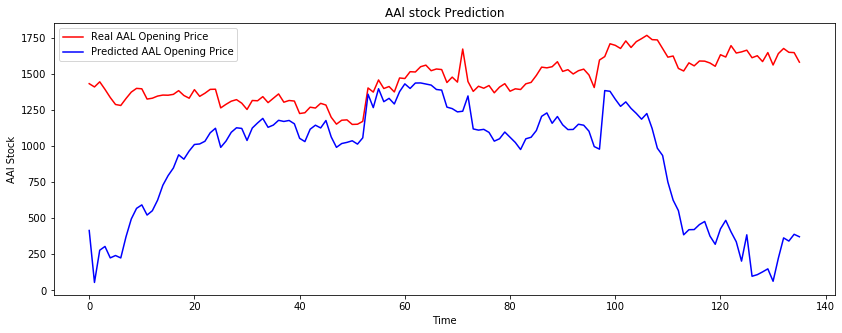

In [30]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real AAL Opening Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted AAL Opening Price')
plt.title('AAl stock Prediction')
plt.xlabel('Time')
plt.ylabel('AAl Stock')
plt.legend()
plt.show()

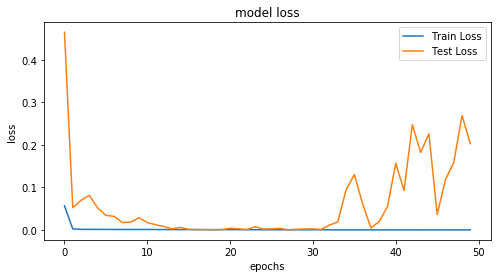

In [31]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [32]:
testScore = sqrt(mean_squared_error(y_pred,y_test))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 692.68 RMSE
